# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#import warnings
#warning.filterwarnings('ignore')

### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv("dataset.csv")

### Check the shape of the dataframe


In [3]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
business_code,business_code,0.000
cust_number,cust_number,0.000
name_customer,name_customer,0.000
clear_date,clear_date,20.000
buisness_year,buisness_year,0.000
doc_id,doc_id,0.000
posting_date,posting_date,0.000
document_create_date,document_create_date,0.000
document_create_date.1,document_create_date.1,0.000
due_in_date,due_in_date,0.000


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df['invoice_id']

0        1.930438e+09
1        1.929646e+09
2        1.929874e+09
3        2.960623e+09
4        1.930148e+09
             ...     
49995    1.930797e+09
49996    1.929744e+09
49997    1.930537e+09
49998    1.930199e+09
49999    1.928576e+09
Name: invoice_id, Length: 50000, dtype: float64

In [10]:
df['doc_id']

0        1.930438e+09
1        1.929646e+09
2        1.929874e+09
3        2.960623e+09
4        1.930148e+09
             ...     
49995    1.930797e+09
49996    1.929744e+09
49997    1.930537e+09
49998    1.930199e+09
49999    1.928576e+09
Name: doc_id, Length: 50000, dtype: float64

In [11]:
print(list(df['doc_id'] == df['invoice_id']).count(True))

49994


In [12]:
df['doc_id'].equals(df['invoice_id'])

False

#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [13]:
print(list(df['baseline_create_date'] == df['document_create_date']).count(True))
print(list(df['baseline_create_date'] == df['document_create_date.1']).count(True))
print(list(df['document_create_date'] == df['document_create_date.1']).count(True))

15963
44452
21232


#### Please check, Column 'posting_id' is constant columns or not


In [14]:
len(df['posting_id'].unique())

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [15]:
len(df['isOpen'].unique())

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [16]:
df.drop(['area_business',
         "posting_id",
         "invoice_id",
         "document_create_date",
         "isOpen",
         'document type',
         'document_create_date.1'],axis=1,inplace=True)


### Please check from the dataframe whether all the columns are removed or not 

In [17]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4


### Show all the Duplicate rows from the dataframe

In [18]:
dup_row = df[df.duplicated()]
dup_row.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10


### Display the Number of Duplicate Rows

In [19]:
len(df[df.duplicated(keep=False)])


2308

### Drop all the Duplicate Rows

In [20]:
df.drop_duplicates(inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [21]:
dup_row = df[df.duplicated()]
dup_row.count()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
dtype: int64

### Check for the number of Rows and Columns in your dataset

In [22]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [23]:
df.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [24]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [25]:
print(df['clear_date'].dtype)
print(df['posting_date'].dtype)
print(df['due_in_date'].dtype)
print(df['baseline_create_date'].dtype)

object
object
float64
float64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [26]:
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [27]:
print(df['clear_date'].dtype)
print(df['posting_date'].dtype)
print(df['due_in_date'].dtype)
print(df['baseline_create_date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [28]:
df['invoice_currency'].nunique()

2

#### display the "total_open_amount" column value

In [29]:
df['total_open_amount'].values

array([5.427328e+04, 7.965660e+04, 2.253860e+03, ..., 6.120860e+03,
       6.348000e+01, 1.790300e+03])

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [30]:
df['converted_usd']=np.where(df['invoice_currency'] == 'CAD', (df['total_open_amount']*0.7),df['total_open_amount'])

### Display the new "converted_usd" column values

In [31]:
df['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [32]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [33]:
df.drop(['invoice_currency','total_open_amount',],axis=1,inplace=True)

### Write a code to check the number of columns in dataframe

In [34]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [35]:
df.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

#### Find out the number of null values from the column that you got from the above code

In [36]:
df.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [37]:
nulldata=df[df['clear_date'].isnull()].copy()
maindata=df[df['clear_date'].notnull()].copy()

### Check the number of Rows and Columns for both the dataframes 

In [38]:
maindata.shape

(39158, 11)

In [39]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [40]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [41]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [42]:
maindata['delay'] = maindata.loc[:, 'clear_date'] - maindata.loc[:, 'due_in_date']
maindata['delay'] = maindata['delay'].astype('timedelta64[D]').astype(int)

In [43]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [44]:
df= maindata.groupby('name_customer')['delay'].mean(numeric_only=False)
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [45]:
maindata['avg_delay'] = maindata["name_customer"].map(df)
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1,-2.702202
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3,19.000000
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92,8.090909
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3,-2.185096
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61,71.444444


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [46]:
maindata['avg_delay'] = maindata['avg_delay']*86400

### Display the maindata dataframe 

In [47]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61,6.172800e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [48]:
maindata.drop(['delay','clear_date',],axis=1,inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [49]:
y = maindata['avg_delay'] 

In [50]:
X = maindata.drop('avg_delay', axis=1) 

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [51]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X,y,test_size=0.4,random_state=0) 

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [52]:
print(X_train.shape)
print(X_loc_test.shape)
print(y_train.shape)
print(y_loc_test.shape)

(23494, 10)
(15664, 10)
(23494,)
(15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [53]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test,y_loc_test,test_size=0.5,random_state=0) 

### Please check for the number of rows and columns of all the 4 dataframes 

In [54]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(7832, 10)
(7832, 10)
(7832,)
(7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

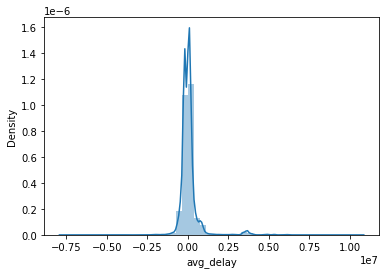

In [55]:
sns.distplot(maindata['avg_delay'])

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [56]:
new_dataframe = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
new_dataframe

,name_customer,doc_id
0,17135 associates,1
1,236008 associates,1
2,99 CE associates,2
3,99 CE corporation,2
4,99 CE foundation,2
...,...,...
3097,YAEGER corp,1
3098,YEN BROS,1
3099,YEN BROS co,1
3100,YEN BROS corp,1


### You can make another distribution plot of the "doc_id" column from x_train

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='doc_id', ylabel='Density'>

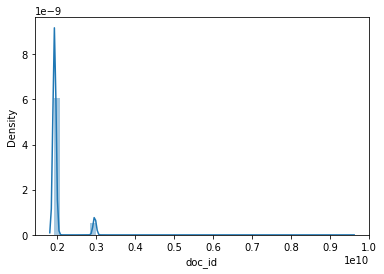

In [57]:
sns.distplot(X_train.doc_id)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

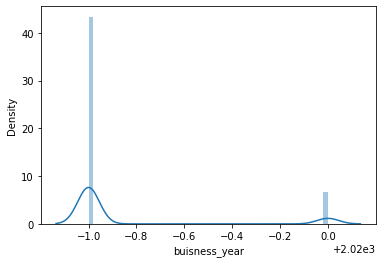

In [58]:
sns.distplot(X_train['buisness_year'])

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnin

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

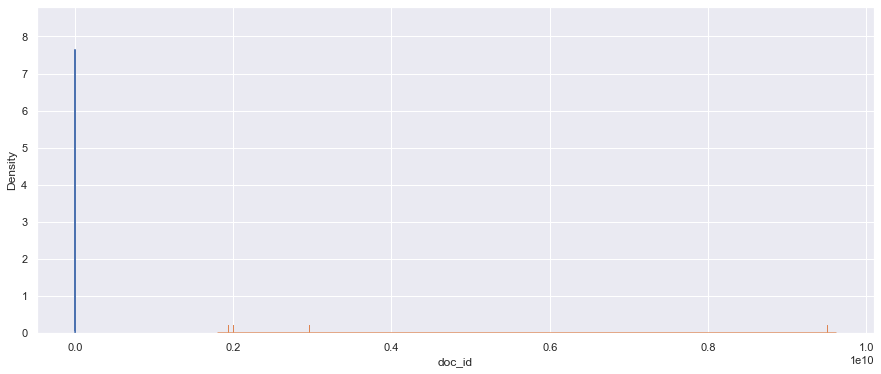

In [59]:
sns.set(rc={'figure.figsize':(15,6)})
sns.distplot(X_train['buisness_year'],hist=False,rug=True)
sns.distplot(X_train['doc_id'],hist=False,rug=True)

# Feature Engineering 

### Display and describe the X_train dataframe 

In [60]:
X_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
45718,U001,0200794332,COST foundation,2020.0,1.930448e+09,2020-01-28,2020-02-12,2020-01-28,NAAX,36273.03
17966,U001,0200706844,WINC trust,2020.0,1.930517e+09,2020-02-13,2020-02-28,2020-02-13,NAA8,6349.27
21322,U001,0200803720,DEC us,2019.0,1.928590e+09,2019-01-08,2019-01-24,2019-01-01,NAM4,282.84
38919,U001,0200752302,KROGER,2020.0,1.930509e+09,2020-02-12,2020-02-27,2020-02-12,NAA8,64749.18
25191,U001,0200974851,RESTA co,2019.0,1.929483e+09,2019-06-12,2019-06-27,2019-06-12,NAA8,2066.63


In [61]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132247,2.014021e+09,30999.755826
std,0.338766,2.956842e+08,36630.432880
min,2019.000000,1.928502e+09,4.380000
25%,2019.000000,1.929174e+09,4622.179500
50%,2019.000000,1.929731e+09,16919.885000
75%,2019.000000,1.930209e+09,45911.302500
max,2020.000000,9.500000e+09,632134.240000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [62]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [63]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [65]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
45718,U001,1
17966,U001,1
21322,U001,1
38919,U001,1
25191,U001,1
...,...,...
26152,U001,1
40790,U001,1
38558,U001,1
26776,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [66]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [67]:
X_train ,X_val, X_test = custom(['business_code'])

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [68]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [69]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [70]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [71]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [72]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value

In [73]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [74]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [75]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [76]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [77]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [79]:
X_train['day_of_baselinedate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baselinedate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baselinedate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baselinedate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baselinedate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baselinedate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baselinedate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baselinedate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baselinedate'] = X_test['baseline_create_date'].dt.year

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [80]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [81]:
X_train['day_of_duedate'] = X_train['due_in_date'].dt.day
X_train['month_of_duedate'] = X_train['due_in_date'].dt.month
X_train['year_of_duedate'] = X_train['due_in_date'].dt.year

X_val['day_of_duedate'] = X_val['due_in_date'].dt.day
X_val['month_of_duedate'] = X_val['due_in_date'].dt.month
X_val['year_of_duedate'] = X_val['due_in_date'].dt.year


X_test['day_of_duedate'] = X_test['due_in_date'].dt.day
X_test['month_of_duedate'] = X_test['due_in_date'].dt.month
X_test['year_of_duedate'] = X_test['due_in_date'].dt.year

c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\chenna krishna\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [82]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [83]:
X_test.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_baselinedate         int64
month_of_baselinedate       int64
year_of_baselinedate        int64
day_of_duedate              int64
month_of_duedate            int64
year_of_duedate             int64
dtype: object

In [84]:
X_val.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_baselinedate         int64
month_of_baselinedate       int64
year_of_baselinedate        int64
day_of_duedate              int64
month_of_duedate            int64
year_of_duedate             int64
dtype: object

In [85]:
X_train.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_baselinedate         int64
month_of_baselinedate       int64
year_of_baselinedate        int64
day_of_duedate              int64
month_of_duedate            int64
year_of_duedate             int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [86]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [87]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [88]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [89]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [90]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['year_of_baselinedate',
 'year_of_duedate',
 'month_of_duedate',
 'month_of_baselinedate',
 'day_of_baselinedate',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

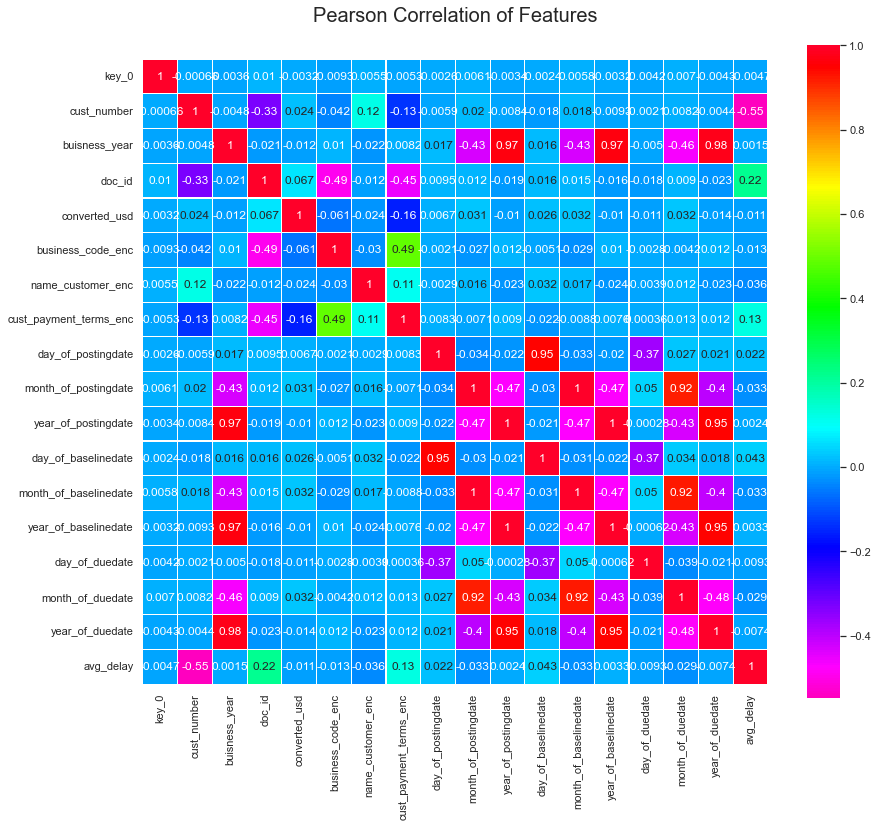

In [91]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [92]:
from sklearn.feature_selection import VarianceThreshold
sel =VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [93]:
sel.variances_

array([1.81954912e+15, 1.14757386e-01, 8.74254278e+16, 1.34173150e+09,
       2.87927752e-01, 1.07015118e+06, 1.35481309e+02, 7.55282009e+01,
       1.22549606e+01, 1.14798749e-01, 7.70243713e+01, 1.22619699e+01,
       1.14937418e-01, 7.66173615e+01, 1.20665594e+01, 1.18125269e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [95]:
MSE_Score = []
R2_Score = []
Algorithm = []

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [96]:
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [97]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [98]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

521974.1317256372

### Display The Comparison Lists

In [99]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[289680195643.01917],[0.319832218839604],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [100]:
Algorithm.append('Support Vector Regression')
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [101]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [102]:
predict_test1= regressor.predict(X_val)
mean_squared_error(y_val, predict_test1, squared=False)

521974.1317256372

### Display The Comparison Lists

In [103]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[289680195643.01917, 289680195643.01917],[0.319832218839604, 0.319832218839604],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [104]:
Algorithm.append('Decision Tree Regressor')
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predicted2= dt.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [105]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [106]:
predict_test1= regressor.predict(X_val)
mean_squared_error(y_val, predict_test1, squared=False)

521974.1317256372

### Display The Comparison Lists

In [107]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor'],[289680195643.01917, 289680195643.01917, 289680195643.01917],[0.319832218839604, 0.319832218839604, 0.319832218839604],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
Algorithm.append('Random Forest Regressor')
rf.fit(X_train, y_train)
predicted3= rf.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [109]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [110]:
predict_test1= regressor.predict(X_val)
mean_squared_error(y_val, predict_test1, squared=False)

521974.1317256372

### Display The Comparison Lists


In [111]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],[289680195643.01917, 289680195643.01917, 289680195643.01917, 289680195643.01917],[0.319832218839604, 0.319832218839604, 0.319832218839604, 0.319832218839604],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [112]:
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [113]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [114]:
predict_test1= regressor.predict(X_val)
mean_squared_error(y_val, predict_test1, squared=False)

350656.3387120784

### Display The Comparison Lists


In [115]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[289680195643.01917, 289680195643.01917, 289680195643.01917, 289680195643.01917, 153265909840.83405],[0.319832218839604, 0.319832218839604, 0.319832218839604, 0.319832218839604, 0.6401323411406582],

## You need to make the comparison list into a comparison dataframe 

In [116]:
dat = pd.DataFrame()
dat ['Algorithm'] = Algorithm
dat ['MSE_score'] = MSE_Score
dat ['R2_Score']=R2_Score
dat 

,Algorithm,MSE_score,R2_Score
0,LinearRegression,2.896802e+11,0.319832
1,Support Vector Regression,2.896802e+11,0.319832
2,Decision Tree Regressor,2.896802e+11,0.319832
3,Random Forest Regressor,2.896802e+11,0.319832
4,XGB Regressor,1.532659e+11,0.640132


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [117]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [118]:
mean_squared_error(y_test,predictedfinal,squared=False)

391491.90265040484

### Calculate the mean Square Error for validation dataset

In [119]:
mean_squared_error(y_val,predict_testfinal,squared=False)

350656.3387120784

### Calculate the R2 score for test

In [120]:
r2_score(y_test, predictedfinal)

0.6401323411406582

### Calculate the R2 score for Validation

In [121]:
r2_score(y_val, predict_testfinal)

0.6905912864894137

### Calculate the Accuracy for train Dataset 

In [122]:
regressorfinal.score(X_train,y_train)

0.9561689299223204

### Calculate the accuracy for validation

In [123]:
regressorfinal.score(X_val,y_val)

0.6905912864894137

### Calculate the accuracy for test

In [124]:
regressorfinal.score(X_test,y_test)

0.6401323411406582

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [125]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


### Check for the number of rows and columns in the nulldata

In [126]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [127]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [128]:
Null_data=nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [129]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [130]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [131]:
nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_baselinedate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_baselinedate'] =nulldata['baseline_create_date'].dt.month
nulldata['year_of_baselinedate'] = nulldata['baseline_create_date'].dt.year


nulldata['day_of_duedate'] = nulldata['due_in_date'].dt.day
nulldata['month_of_duedate'] = nulldata['due_in_date'].dt.month
nulldata['year_of_duedate'] =nulldata['due_in_date'].dt.year

nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] =nulldata['clear_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [132]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [133]:
for cols in nulldata.columns: 
    print(f"{cols} - {nulldata[f'{cols}'].dtype}")

business_code - object
cust_number - int32
name_customer - object
clear_date - datetime64[ns]
buisness_year - float64
doc_id - float64
posting_date - datetime64[ns]
due_in_date - datetime64[ns]
baseline_create_date - datetime64[ns]
cust_payment_terms - object
converted_usd - float64
business_code_enc - int32
day_of_postingdate - int64
month_of_postingdate - int64
year_of_postingdate - int64
day_of_baselinedate - int64
month_of_baselinedate - int64
year_of_baselinedate - int64
day_of_duedate - int64
month_of_duedate - int64
year_of_duedate - int64
day_of_cleardate - float64
month_of_cleardate - float64
year_of_cleardate - float64
cust_payment_terms_enc - int32
name_customer_enc - int32


### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [134]:
nulldata.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date",
               "cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"],axis=1,inplace=True)

### Check the information of the "nulldata" dataframe

In [135]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_baselinedate     9681 non-null   int64  
 9   month_of_baselinedate   9681 non-null   int64  
 10  year_of_baselinedate    9681 non-null   int64  
 11  day_of_duedate          9681 non-null   int64  
 12  month_of_duedate        9681 non-null   int64  
 13  year_of_duedate         9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [136]:
nulldata.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_baselinedate     9681 non-null   int64  
 9   month_of_baselinedate   9681 non-null   int64  
 10  year_of_baselinedate    9681 non-null   int64  
 11  day_of_duedate          9681 non-null   int64  
 12  month_of_duedate        9681 non-null   int64  
 13  year_of_duedate         9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [137]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baselinedate', 'month_of_baselinedate', 'year_of_baselinedate',
       'day_of_duedate', 'month_of_duedate', 'year_of_duedate'],
      dtype='object')

In [138]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_baselinedate', 'month_of_baselinedate',
       'year_of_baselinedate', 'day_of_duedate', 'month_of_duedate',
       'year_of_duedate', 'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [139]:
#nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
#       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
#       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
#       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
#       'day_of_due', 'month_of_due', 'year_of_due']]
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_baselinedate', 'month_of_baselinedate',
       'year_of_baselinedate', 'day_of_duedate', 'month_of_duedate',
       'year_of_duedate', 'cust_payment_terms_enc', 'name_customer_enc']]

### Display the Final Dataset

In [140]:
nulldata2.head(5)

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baselinedate,month_of_baselinedate,year_of_baselinedate,day_of_duedate,month_of_duedate,year_of_duedate,cust_payment_terms_enc,name_customer_enc
3,140105686,2020.0,2.960623e+09,2309.79,66,30,3,2020,31,3,2020,10,4,2020,5,2714
7,200744019,2020.0,1.930659e+09,11173.02,66,19,3,2020,19,3,2020,3,4,2020,18,2798
10,200418007,2020.0,1.930611e+09,3525.59,66,11,3,2020,11,3,2020,26,3,2020,18,89
14,200739534,2020.0,1.930788e+09,121105.65,66,15,4,2020,15,4,2020,30,4,2020,18,2043
15,200353024,2020.0,1.930817e+09,3726.06,66,23,4,2020,16,4,2020,26,4,2020,34,733


In [141]:
X_train.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baselinedate,month_of_baselinedate,year_of_baselinedate,day_of_duedate,month_of_duedate,year_of_duedate
45718,200794332,2020.0,1.930448e+09,36273.03,1,630,20,28,1,2020,28,1,2020,12,2,2020
17966,200706844,2020.0,1.930517e+09,6349.27,1,3069,18,13,2,2020,13,2,2020,28,2,2020
21322,200803720,2019.0,1.928590e+09,282.84,1,728,36,8,1,2019,1,1,2019,24,1,2019
38919,200752302,2020.0,1.930509e+09,64749.18,1,1580,18,12,2,2020,12,2,2020,27,2,2020
25191,200974851,2019.0,1.929483e+09,2066.63,1,2315,18,12,6,2019,12,6,2019,27,6,2019


### Now you can pass this dataset into you final model and store it into "final_result"

In [142]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [143]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [144]:
final_result.head()

0    6.294758e+05
1    1.609205e+06
2    3.667019e+05
3    3.440560e+05
4    7.551911e+05
Name: avg_delay, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [145]:
Null_data.reset_index(drop=True,inplace=True)
Final = Null_data.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [146]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,6.294758e+05
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,1.609205e+06
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,3.667019e+05
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,3.440560e+05
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,7.551911e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [147]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [148]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [149]:
Final['clear_date']

0      2020-04-17 06:51:15.750000000
1      2020-04-21 15:00:05.250000000
2      2020-03-30 05:51:41.906250000
3      2020-05-03 23:34:16.031250000
4      2020-05-04 17:46:31.125000000
                    ...             
9676   2020-03-24 19:29:11.460937500
9677   2020-05-19 05:50:34.914062500
9678   2020-03-28 04:09:10.062500000
9679   2020-04-14 07:33:17.906250000
9680   2020-05-20 23:52:53.625000000
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [150]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [151]:
Final['avg_delay']

0        7.0
1       18.0
2        4.0
3        3.0
4        8.0
        ... 
9676    -1.0
9677     1.0
9678     2.0
9679     5.0
9680    14.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [152]:
bins= [0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [153]:
Final.drop(['key_0','avg_delay'],axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [154]:
#Final['Aging Bucket'].unique()
Final['Aging Bucket'].value_counts()

0-15               7308
16-30              1002
31-45               135
46-60                 9
Greatar than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [155]:
Final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-17 06:51:15.750000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-21 15:00:05.250000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,16-30
2,U001,0200418007,AM,2020-03-30 05:51:41.906250,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,0-15
3,U001,0200739534,OK systems,2020-05-03 23:34:16.031250,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-05-04 17:46:31.125000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,0-15


### Store this dataframe into the .csv format

In [156]:
Final.to_csv('Final.csv', index=False)

# END OF THE PROJECT